# Task 3 - Clustering (34 points)

**Task Description:** A student who has not attended this course yet but who is interested in data mining tried to cluster two datasets. Unfortunately, they did not succeed and asked you for some help. In this task, you will read what the student said about their experience and help them by describing the data and the clustering algorithms. You will also try out the clustering algorithms yourself to make sure that your recommendations are correct.

**Quality Assessment:** To encourage you not to use AI tools and to write the solutions yourself, we will deduct additional points if your solutions are consequently weird (e.g. describe clusters as "precise" or "irregular") or do not answer the question. If you write the solutions yourself, paying attention to the task description, this should not affect you (even if you make some mistakes). However, if you copy answers form AI tools, which often use weird words or return irrelevant solutions, you will most likely get negative points, reducing the total points you get for this assignment.

**Input:** The data folder contains the input files (`dataset1.csv`, `dataset2.csv`). In each dataset the data points have 2 features and 1 class label. Do not forget to exclude the data that should not be considered for clustering when you apply the algorithms on the datasets.

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## 3.1 Dataset 1 (15 points)

Student: "I've read that K-Means is usually the default algorithm to cluster datasets as it needs only the number of clusters to be specified. I could figure out how to run it but the results are really bad, it splits the clusters in a really weird way."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

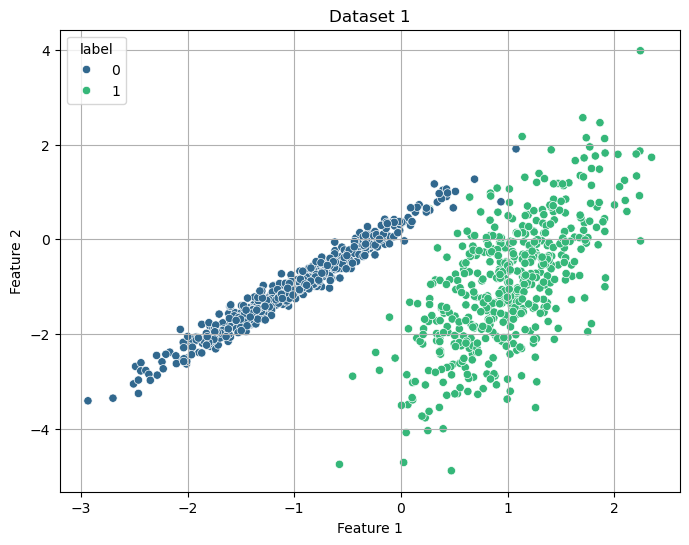

In [2]:
# Load the dataset1
dataset1 = pd.read_csv('data/dataset1.csv')

# Plot the data with class-based coloring
plt.figure(figsize=(8, 6))
sb.scatterplot(data=dataset1, x='X', y='Y', hue='label', palette='viridis', legend='full')
plt.title("Dataset 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

The visualization of `dataset1.csv` gives us two well-separated clusters. On the left side, the data of class 0, which are stretched along the diagonal following the straight line, and on the right side, compact circular formed cluster. Since two clusters have the different shapes, this makes it hard to use K-Means algorithm, because K-Means assumes, clusters are to be in spherical form.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

The algorithm, K-Means, which student has chosen for his clustering is mostly used for spherical cluster and well-separated data. In case of `dataset1`, the data are well-separated, but not spherical. So here, the K-Means algorithm assumes the data are spherical, but in reality, the data of class 0 are along the diagonal and the data of class 1 are roughly circular, which is a violation of K-Means assumption.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

More suitable clustering algorithm in this case would be DBSCAN. While K-Means assumes the cluster are in spherical shape, DBSCAN is perfect for data with noise and clusters with varying shapes and densities, just like we have. Since our data lies along diagonal and other part compacted on the right side, DBSCAN can handle this imbalance, because it groups points based on density, which is perfect for arbitrary shaped clusters like ours.

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

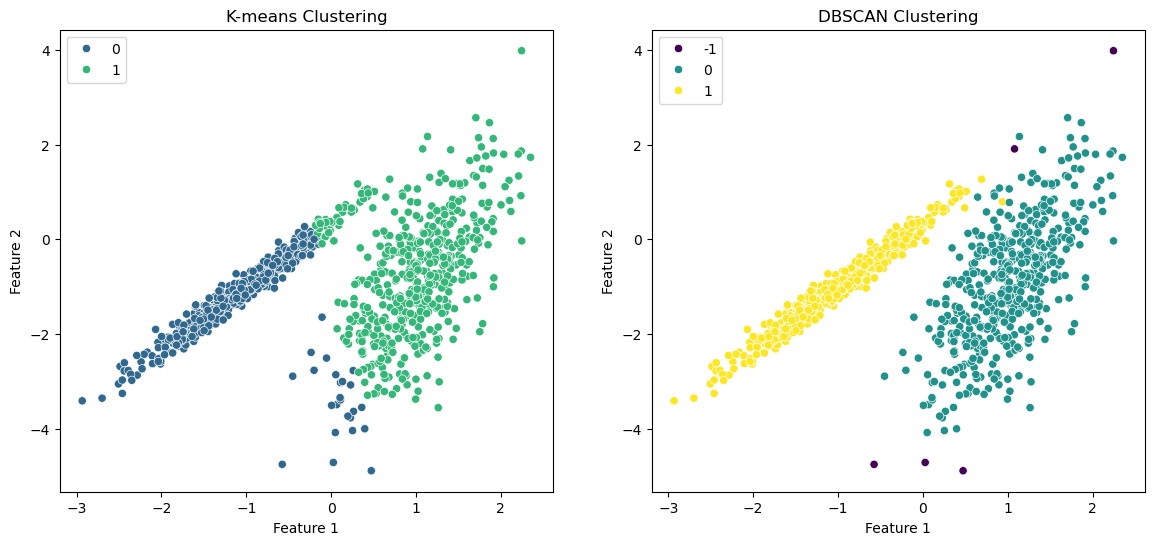

In [3]:
'''
https://medium.com/@nomannayeem/clustering-with-confidence-a-practical-guide-to-data-clustering-in-python-15d82d8a7bfb
Section: Choosing the Right Clustering Algorithm
'''

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(dataset1)

# DBSCAN clustering
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels1 = dbscan1.fit_predict(dataset1)

# Plotting clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K-means plot
sb.scatterplot(ax=ax1, data=dataset1, x='X', y='Y', hue=kmeans_labels, palette='viridis', legend='full')
ax1.set_title(f'K-means Clustering')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# DBSCAN plot
sb.scatterplot(ax=ax2, data=dataset1, x='X', y='Y', hue=dbscan_labels1, palette='viridis', legend='full')
ax2.set_title(f'DBSCAN Clustering')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [4]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html
Calculating Normalized Mutual Information (NMI) for K-means and DBSCAN
'''
nmi_kmeans = normalized_mutual_info_score(dataset1['label'], kmeans_labels)
nmi_dbscan1 = normalized_mutual_info_score(dataset1['label'], dbscan_labels1)

'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html
Calculating Rand Index for K-means and DBSCAN
'''
adjusted_and_index_kmeans = adjusted_rand_score(dataset1['label'], kmeans_labels)
adjusted_rand_index_dbscan1 = adjusted_rand_score(dataset1['label'], dbscan_labels1)

# Print the results
print(f"K-means NMI: {nmi_kmeans:.2f}, Adjusted Rand Index: {adjusted_and_index_kmeans:.2f}")
print(f"DBSCAN NMI: {nmi_dbscan1:.2f}, Adjusted Rand Index: {adjusted_rand_index_dbscan1:.2f}")

K-means NMI: 0.63, Adjusted Rand Index: 0.73
DBSCAN NMI: 0.98, Adjusted Rand Index: 0.99


## 3.2 Dataset 2 (15 points)

Student: "I have no clue what's wrong with K-Means so I tried the AgglomerativeClustering model from sklearn on the other dataset. I used it with average linkage to cluster the data, I guess I should get an average or better result with it?? I set n_clusters to the correct number of clusters but it seems to have put everything into a single cluster..."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

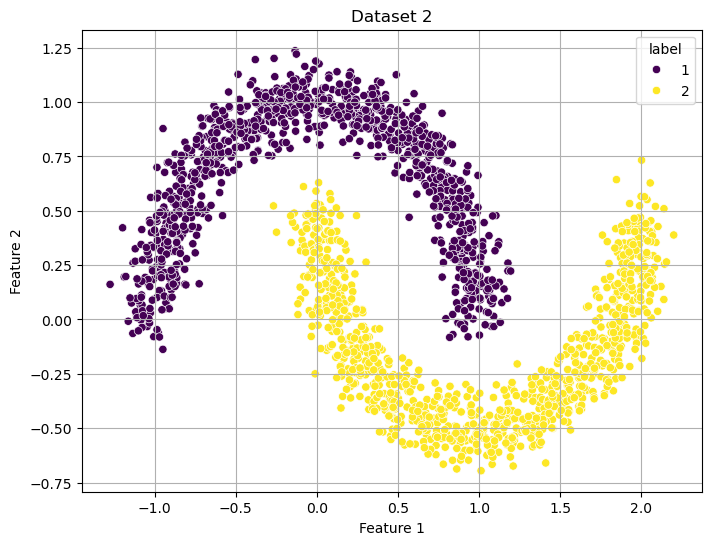

In [5]:
# Load the dataset2
dataset2 = pd.read_csv('data/dataset2.csv')

# Plot the data with class-based coloring
plt.figure(figsize=(8, 6))
sb.scatterplot(data=dataset2, x='X', y='Y', hue='label', palette='viridis', legend='full')
plt.title("Dataset 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

The dataset structured as two half-moons shape. The data are clearly well-separated from each other, but the shape is not simple for clustering. Because of this complicated round shape, it's not easy for algorithms to separate well between clusters.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

The problem is that agglomerative algorithm treats each point as its own cluster. This method works perfectly on a cluster with spherical shape, but has complication when dealing with complicated shapes like in this example. Since clusters are grouped according to average distance, it cannot properly handle the curved shape and most probably will merge some data points into one cluster.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

Here I again suggest DBSCAN due to the way it handle the data.So, as said previously, it groups data points based on density and this makes it easy to detect arbitarily shaped clusters, which are in our case now two half-moons shapes. So, since the agglomerative algorithms makes an assumption on spherical cluster,DBSCAN identifies clusters based on density, and not the distance alone, and it makes it perfect choice for curved clusters like ours.

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

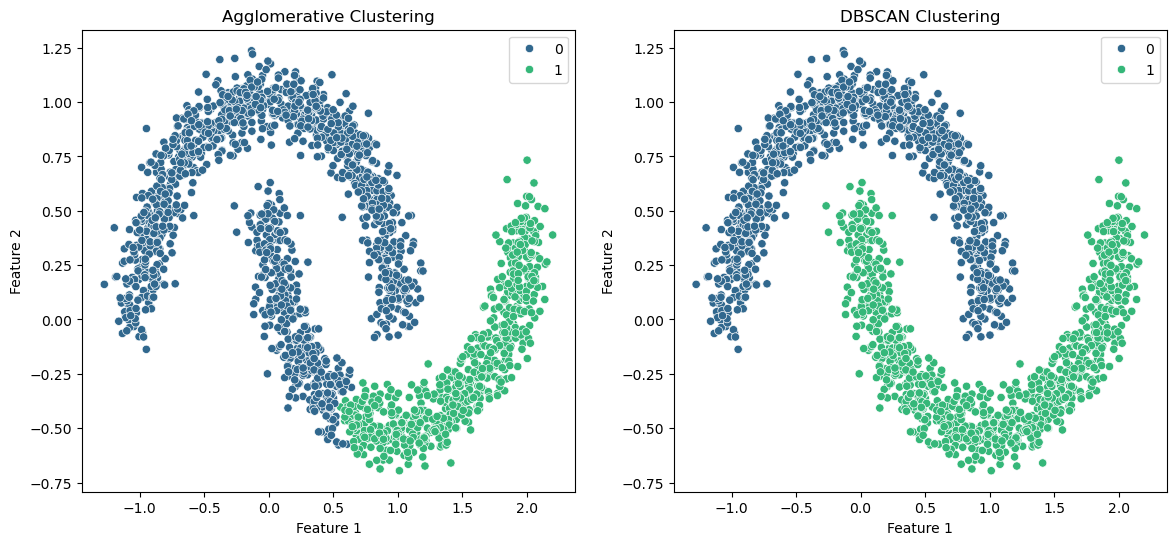

In [6]:
'''
https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/
Section: Agglomerative Hierarchy clustering algorithm
'''

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_labels = agglomerative.fit_predict(dataset2)

'''
https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/
Section: DBSCAN clustering algorithm
'''
# DBSCAN clustering
dbscan2 = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels2 = dbscan2.fit_predict(dataset2)

# Plotting clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K-means plot
sb.scatterplot(ax=ax1, data=dataset2, x='X', y='Y', hue=agglomerative_labels, palette='viridis', legend='full')
ax1.set_title(f'Agglomerative Clustering')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# DBSCAN plot
sb.scatterplot(ax=ax2, data=dataset2, x='X', y='Y', hue=dbscan_labels2, palette='viridis', legend='full')
ax2.set_title(f'DBSCAN Clustering')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [7]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html
Calculating Normalized Mutual Information (NMI) for K-means and DBSCAN
'''
nmi_agglomerative = normalized_mutual_info_score(dataset2['label'], agglomerative_labels)
nmi_dbscan2 = normalized_mutual_info_score(dataset2['label'], dbscan_labels2)

'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html
Calculating Rand Index for K-means and DBSCAN
'''
adjusted_and_index_agglomerative = adjusted_rand_score(dataset2['label'], agglomerative_labels)
adjusted_rand_index_dbscan2 = adjusted_rand_score(dataset2['label'], dbscan_labels2)

# Print the results
print(f"K-means NMI: {nmi_agglomerative:.2f}, Adjusted Rand Index: {adjusted_and_index_agglomerative:.2f}")
print(f"DBSCAN NMI: {nmi_dbscan2:.2f}, Adjusted Rand Index: {adjusted_rand_index_dbscan2:.2f}")

K-means NMI: 0.45, Adjusted Rand Index: 0.40
DBSCAN NMI: 1.00, Adjusted Rand Index: 1.00


## 3.3 Literature (4 points)

Recommend the student 2 sources that could help them to learn more about clustering. The sources you recommend can be in any format (book, article, blog, video, interactive tutorial, etc.) but it should have a good quality. The topic should be clustering in general or the clustering algorithms you used. State the full urls of the websites (or cite the books properly) and write 3 examples what the student could learn from each.


##### 1. Clustering with Confidence: A Practical Guide to Data Clustering in Python
https://medium.com/@nomannayeem/clustering-with-confidence-a-practical-guide-to-data-clustering-in-python-15d82d8a7bfb

* How to implement most common algorithms like K-Means, DBSCAN and Hierarchical Clustering
* How to choose the right number of clusters and evaluate quality using metrics like Silhouette Score
* How to visualize clustering results

##### 2. 8 Clustering Algorithms in Machine Learning that All Data Scientists Should Know
https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

* 8 commonly used clustering algorithms in machine learning
* Advantages and assumptions of each algorithms, to understand when to apply which method
* Different types of clustering algorithms